In [11]:
# K-Means Clustering Example
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

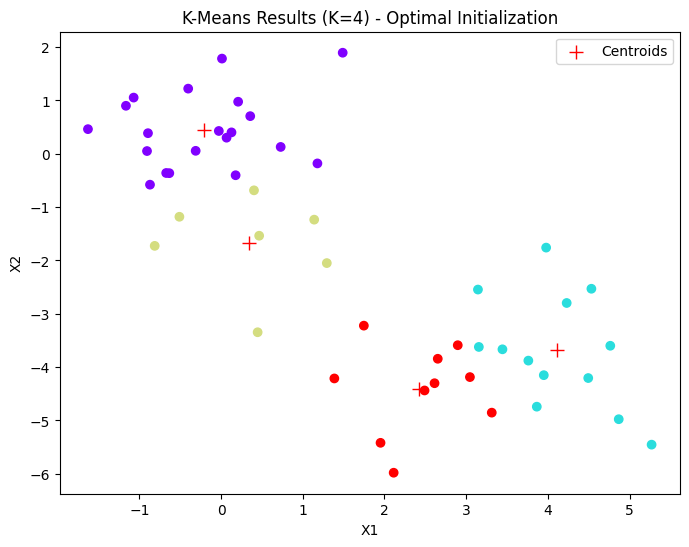

In [12]:
# 5. Visualize the best clustering result (n_init=20)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans20.labels_, cmap=plt.cm.rainbow)
plt.title(f"K-Means Results (K={K}) - Optimal Initialization")
plt.scatter(kmeans20.cluster_centers_[:, 0],
            kmeans20.cluster_centers_[:, 1],
            marker='+', s=100, color='red', label='Centroids', linewidth=1)
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

In [13]:
# 4. Compare performance (within-cluster variation)
print(f"Within-Cluster Variation (K={K}, n_init=1): {kmeans1.inertia_:.2f}")
print(f"Within-Cluster Variation (K={K}, n_init=20): {kmeans20.inertia_:.2f}")

Within-Cluster Variation (K=4, n_init=1): 57.77
Within-Cluster Variation (K=4, n_init=20): 57.77


In [14]:
# 3. Perform K-Means clustering with K=4
K = 2

# Using n_init=1 to demonstrate a poor result (local optimum)
kmeans1 = KMeans(n_clusters=K, random_state=3, n_init=1).fit(X)

# Using n_init=20 (recommended) to ensure finding the best local optimum
kmeans20 = KMeans(n_clusters=K, random_state=3, n_init=20).fit(X)

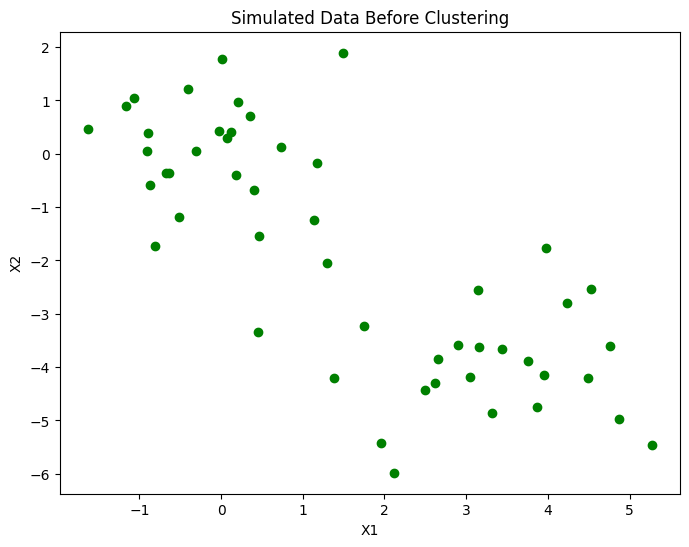

In [15]:
# 2. Visualize the data before clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='green')
plt.title("Simulated Data Before Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [16]:
# 1. Create simulated dataset
# Set seed for reproducibility
np.random.seed(0)

# Create 50 observations
X = np.random.standard_normal((50, 2))

# Shift first 25 observations to create a distinct cluster
X[:25, 0] += 3
X[:25, 1] -= 4

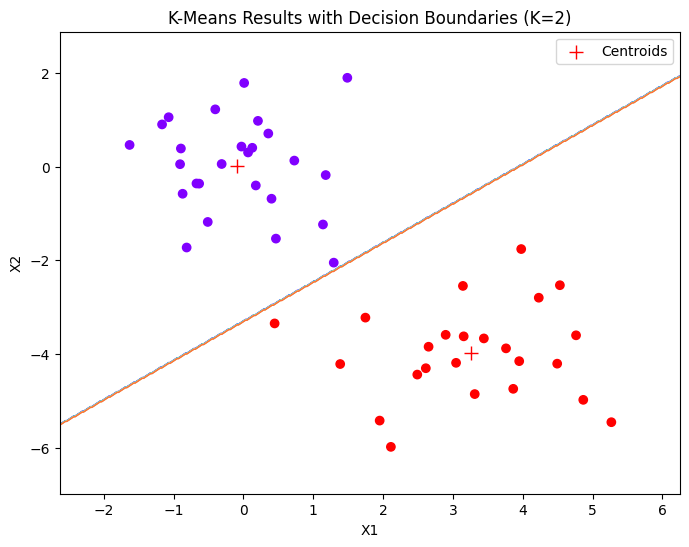

In [17]:
# 5. Visualize decision boundaries

# Create a meshgrid to plot the decision boundaries
h = .02 # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict cluster for each point in the meshgrid
Z = kmeans20.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, cmap=plt.cm.rainbow, linewidths=1) # Changed to contour and added linewidths

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=kmeans20.labels_, cmap=plt.cm.rainbow)

# Plot the centroids
plt.scatter(kmeans20.cluster_centers_[:, 0],
            kmeans20.cluster_centers_[:, 1],
            marker='+', s=100, color='red', label='Centroids', linewidth=1) # Changed marker to '+', size to 100, and added linewidth

plt.title(f"K-Means Results with Decision Boundaries (K={K})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()